In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATA_IN_PATH = "./data_in/"
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", 
                         header = 0, delimiter="\t", quoting=3)
#train_data.head()

In [3]:
print("파일 크기: ")
FILE_SIZE_BASE = 1024 * 1024 # MB
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / FILE_SIZE_BASE,
                                        2)) + "MB")
print("전체 학습 데이터의 개수: {}".format(len(train_data)))    
    

파일 크기: 
labeledTrainData.tsv          32.0MB
testData.tsv                  31.21MB
unlabeledTrainData.tsv        64.16MB
전체 학습 데이터의 개수: 25000


In [4]:
train_length = train_data["review"].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

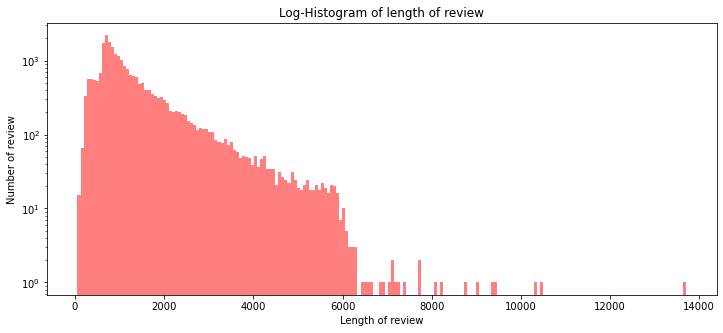

In [5]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color="r", label="word")
plt.yscale("log")
plt.title("Log-Histogram of length of review")
plt.xlabel("Length of review")
plt.ylabel("Number of review")

In [6]:
print("리뷰 길이 최댓값:  {}".format(np.max(train_length)))
print("리뷰 길이 최솟값:  {}".format(np.min(train_length)))
print("리뷰 길이 평균값:  {:.2f}".format(np.mean(train_length)))
print("리뷰 길이 표준편차: {:.2f}".format(np.std(train_length)))
print("리뷰 길이 중간값:   {}".format(np.median(train_length)))

print("리뷰 길이 제1사분위: {}".format(np.percentile(train_length, 25)))
print("리뷰 길이 제3사분위: {}".format(np.percentile(train_length, 75)))



리뷰 길이 최댓값:  13710
리뷰 길이 최솟값:  54
리뷰 길이 평균값:  1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값:   983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5d6c2a710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5d6c2ad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5d6c2a450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe5d6c35490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5d6c35b10>],
 'means': [<matplotlib.lines.Line2D at 0x7fe5d6c357d0>]}

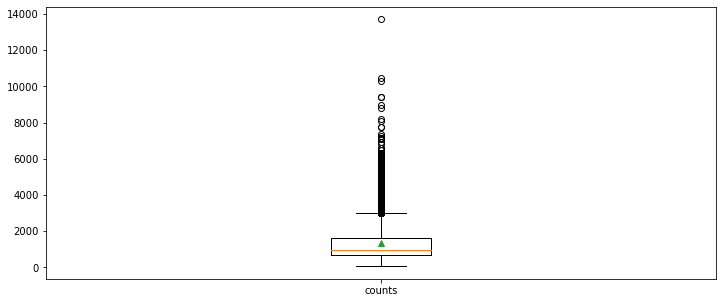

In [7]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data["review"]))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis("off")

(-0.5, 799.5, 599.5, -0.5)

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_data['sentiment'])

In [ ]:
print("긍정 리뷰 개수: {}".format(train_data["sentiment"].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data["sentiment"].value_counts()[0]))
train_word_counts = train_data["review"].apply(lambda x: len(x.split(' ')))

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor="r", label="train")
plt.title("Log-Histogram of word count in review", fontsize=15)
plt.yscale("log")
plt.legend()
plt.xlabel("Number of words", fontsize=15)
plt.ylabel("Number of review", fontsize=15)
# 각 리뷰의 단어 개수

In [ ]:
print("리뷰 단어 개수 최댓값:  {}".format(np.max(train_word_counts)))
print("리뷰 단어 개수 최솟값:  {}".format(np.min(train_word_counts)))
print("리뷰 단어 개수 평균값:  {:.2f}".format(np.mean(train_word_counts)))
print("리뷰 단어 개수 표준편차: {:.2f}".format(np.std(train_word_counts)))
print("리뷰 단어 개수 중간값:   {}".format(np.median(train_word_counts)))

print("리뷰 단어 개수 제1사분위: {}".format(np.percentile(train_word_counts, 25)))
print("리뷰 단어 개수 제3사분위: {}".format(np.percentile(train_word_counts, 75)))

In [ ]:
qmarks = np.mean(train_data["review"].apply(lambda x: "?" in x))
fullstop = np.mean(train_data["review"].apply(lambda x: "." in x))
capital_first = np.mean(train_data["review"].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data["review"].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data["review"].apply(lambda x: max([y.isdigit() for y in x])))

print("물음표가 있는 질문: {:.2f}% ".format(qmarks * 100))
print("마침표가 있는 질문: {:.2f}% ".format(fullstop * 100))
print("첫 글자가 대문자인 질문: {:.2f}% ".format(capital_first * 100))
print("대문자가 있는 질문: {:.2f}% ".format(capitals * 100))
print("숫자가 있는 질문: {:.2f}% ".format(numbers * 100))

In [ ]:
import re
import pandas
import numpy
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [ ]:
DATA_IN_PATH = "./data_in/"
train_data = pd.read_csv( DATA_IN_PATH + "labeledTrainData.tsv", header=0, 
                        delimiter = '\t', quoting = 3)
#print(train_data["review"][0])

In [ ]:
review = train_data["review"][0]
review_text = BeautifulSoup(review, "html5lib").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text) # 알파벳 빼고 제거
#print(review_text)

In [ ]:
stop_words = set(stopwords.words("english"))
review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if not w in stop_words]
#print(words)

In [ ]:
clean_review = " ".join(words)
#print(clean_review)

In [ ]:
def preprocessing(review, remove_stopwords = False):
    review_text = BeautifulSoup(review, "html5lib").get_text() # HTML 태그 제거
    review_text = re.sub("[^a-zA-Z]", " ", review_text) # 알파벳 빼고 제거
    words = review_text.lower()
    if remove_stopwords:
        # stopwords 제거
        stop_words = set(stopwords.words("english"))
        words = words.split()
        words = [w for w in words if not w in stop_words]
    # 리스트로 쪼개진 문자열 다시 붙임
    clean_review = " ".join(words)
    return clean_review
        

In [ ]:
clean_train_reviews = []
for review in train_data["review"]:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))
#clean_train_reviews[0]

In [ ]:
clean_train_df = pd.DataFrame({"review": clean_train_reviews, 
                               "sentiment": train_data["sentiment"]})
clean_train_df.head()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
#print(text_sequences[0])

In [ ]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
#print(word_vocab)

In [ ]:
print("전체 단어 개수: ", len(word_vocab))

In [ ]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)
MAX_SEQUENCE_LENGTH = 174 # 문자 길이 median 값
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print("Shape of train data: ", train_inputs.shape)
train_labels = np.array(train_data["sentiment"])
print("Shape of label tensor: ", train_labels.shape)

In [ ]:
DATA_IN_PATH = "./data_in/"
TRAIN_INPUT_DATA = "train_input.npy"
TRAIN_LABEL_DATA = "train_label.npy"
TRAIN_CLEAN_DATA = "train_clean.csv"
DATA_CONFIGS = "data_config.json"

import os 
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [ ]:
# 전처리 데이터를 넘파이 형태로 저장 (모델에 그대로 넣을 데이터)
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 CSV 형태로 저장 (vectorize 안된 자연어 데이터)
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, "w"), ensure_ascii=False)

In [ ]:
DATA_IN_PATH = "./data_in/"
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

In [ ]:
clean_test_reviews = []
for review in test_data["review"]:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))
clean_test_df = pd.DataFrame({"review": clean_test_reviews, "id": test_data['id']})
test_id = np.array(test_data['id'])

In [ ]:
# train data로 만든 tokenizer 로 test data를 시퀀스화함
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
# padding도 train data에서 구한 문장 단어 개수의 median 값으로 세팅
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding ='post')

In [ ]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = "test_id.npy"

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, "wb"), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, "wb"), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index=False)

In [ ]:
DATA_IN_PATH = "./data_in/"
TRAIN_CELAN_DATA = "train_clean.csv"
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = "char", sublinear_tf=True,
                            ngram_range=(1,3), max_features=5000)
X = vectorizer.fit_transform(reviews)